In [10]:
# 

Import Modules

In [420]:
pip install textract

Note: you may need to restart the kernel to use updated packages.Collecting textract
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/133.4 kB ? eta -:--:--
   ---------------------------------------- 133.4/133.4 kB 7.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/5.6 MB ? eta -:--:--
   ----------------------------- ---------- 4.1/5.6 MB 128.0 MB/s eta 0:00:01
   ---------------------------------------  5.6/5.6 MB 119.0 MB/s eta 0:00:01
   ---------------------------------------- 5.6/5.6 MB 50.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/106.9 kB ? eta -:--:--
   ---------------------------------------- 106.9/106.9 kB 6.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/69.0 kB ? eta -:--:--
   ---------------------------------

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [11]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore') 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import language_tool_python

Read dataframe

In [310]:
df = pd.read_csv("Proccess.csv", encoding='ISO-8859-1', nrows = 150)
df.head()

,Unnamed: 0,essay_id,essay_set,essay,final_score,clean_essay,char_count,word_count,sent_count,spell_err_count,grade
0,0,1,1,"Dear local newspaper, I think effects computer...",6,Dear local newspaper I think effects computer...,1441,344,16,11,6.7
1,1,2,1,Dear I believe that using computers will benef...,7,Dear I believe using computers benefit us many...,1765,413,17,21,8.2
2,2,3,1,"Dear, More and more people use computers, but ...",5,Dear More people use computers everyone agre...,1185,276,14,5,5.5
3,3,4,1,"Dear Local Newspaper, I have found that many e...",8,Dear Local Newspaper I found many experts say...,2284,490,26,31,10.5
4,4,5,1,Dear I know having computers has a positive ef...,6,Dear I know computers positive effect people ...,2023,469,30,18,9.4


Data Preprocessing

In [311]:
df.shape

(150, 11)

In [313]:
essays = df.drop(columns=['Unnamed: 0','essay_id','essay','essay_set'])
essays.head()

,final_score,clean_essay,char_count,word_count,sent_count,spell_err_count,grade
0,6,Dear local newspaper I think effects computer...,1441,344,16,11,6.7
1,7,Dear I believe using computers benefit us many...,1765,413,17,21,8.2
2,5,Dear More people use computers everyone agre...,1185,276,14,5,5.5
3,8,Dear Local Newspaper I found many experts say...,2284,490,26,31,10.5
4,6,Dear I know computers positive effect people ...,2023,469,30,18,9.4


In [314]:
essays.isnull().sum()

final_score        0
clean_essay        0
char_count         0
word_count         0
sent_count         0
spell_err_count    0
grade              0
dtype: int64

In [152]:
essays.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   final_score      100 non-null    int64 
 1   clean_essay      100 non-null    object
 2   char_count       100 non-null    int64 
 3   word_count       100 non-null    int64 
 4   sent_count       100 non-null    int64 
 5   spell_err_count  100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [159]:
essays.columns

Index(['final_score', 'clean_essay', 'char_count', 'word_count', 'sent_count',
       'spell_err_count'],
      dtype='object')

In [160]:
essays.describe()

,final_score,char_count,word_count,sent_count,spell_err_count
count,100.00000,100.000000,100.000000,100.000000,100.000000
mean,6.22000,1472.730000,342.700000,20.860000,15.030000
std,1.83996,562.060996,128.354583,9.106574,8.410497
min,0.00000,177.000000,41.000000,2.000000,0.000000
25%,5.00000,1112.750000,256.250000,14.750000,9.000000
50%,6.00000,1484.500000,346.000000,20.000000,13.000000
75%,8.00000,1838.500000,430.750000,27.000000,19.000000
max,10.00000,2558.000000,638.000000,47.000000,40.000000


In [315]:
essays.shape

(150, 7)

In [156]:
essays.columns

Index(['final_score', 'clean_essay', 'char_count', 'word_count', 'sent_count',
       'spell_err_count'],
      dtype='object')

In [20]:
'''clmtodrop = ['Examiner_Commen','Task_Response','Coherence_Cohesion','Lexical_Resource','Range_Accuracy']
essays =  df.drop(columns=clmtodrop)
essays.columns'''

Index(['Task_Type', 'Question', 'Essay', 'Overall'], dtype='object')

In [161]:
essays.head()

,final_score,clean_essay,char_count,word_count,sent_count,spell_err_count
0,6,Dear local newspaper I think effects computer...,1441,344,16,11
1,7,Dear I believe using computers benefit us many...,1765,413,17,21
2,5,Dear More people use computers everyone agre...,1185,276,14,5
3,8,Dear Local Newspaper I found many experts say...,2284,490,26,31
4,6,Dear I know computers positive effect people ...,2023,469,30,18


In [22]:
'''tfidf_vectorizer = TfidfVectorizer()'''

In [23]:
'''X_text = tfidf_vectorizer.fit_transform(essays['Essay'])'''

In [316]:
import seaborn as sns

<Axes: xlabel='final_score', ylabel='Density'>

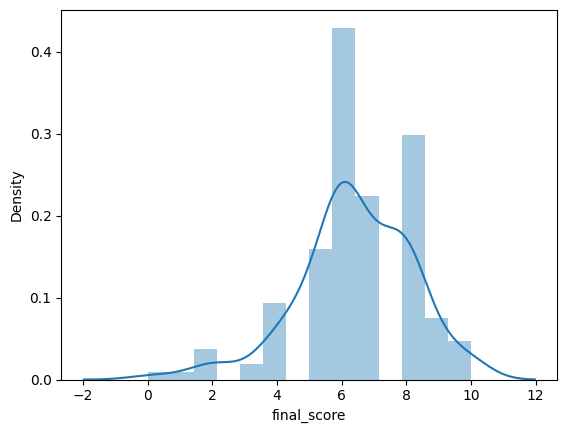

In [416]:
sns.distplot(essays['final_score'])

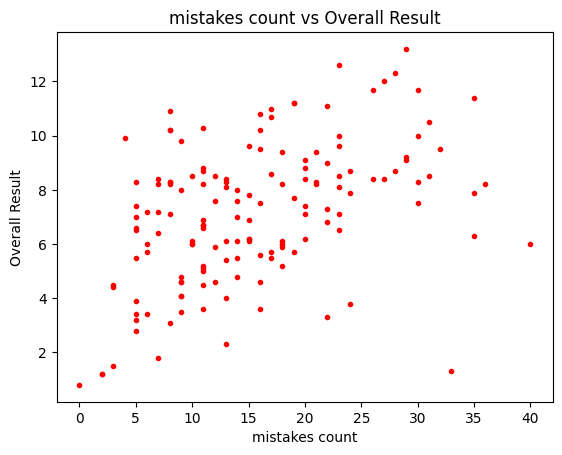

In [417]:
plt.title("mistakes count vs Overall Result")
plt.xlabel('mistakes count')
plt.ylabel('Overall Result')
plt.scatter(essays['spell_err_count'], essays['grade'], color='red', marker='.')
plt.show()

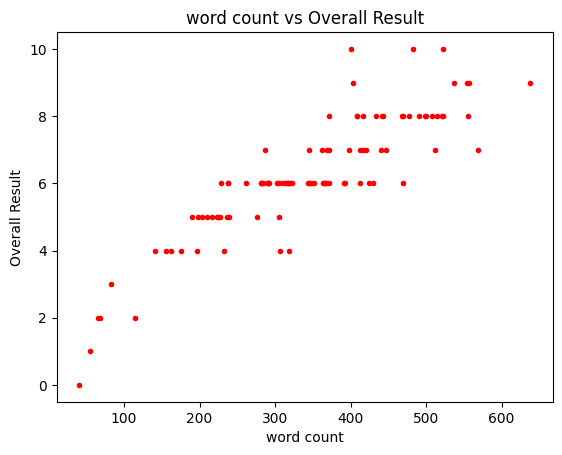

In [165]:
plt.title("word count vs Overall Result")
plt.xlabel('word count')
plt.ylabel('Overall Result')
plt.scatter(essays['word_count'], essays['final_score'], color='red', marker='.')
plt.show()

In [418]:
'''plt.title("sentences count vs Overall Result")
plt.xlabel('sentences count')
plt.ylabel('Overall Result')
plt.scatter(essays['sent_count'], essays['final_score'], color='red', marker='.')
plt.show()'''

'plt.title("sentences count vs Overall Result")\nplt.xlabel(\'sentences count\')\nplt.ylabel(\'Overall Result\')\nplt.scatter(essays[\'sent_count\'], essays[\'final_score\'], color=\'red\', marker=\'.\')\nplt.show()'

In [135]:
from sklearn.feature_extraction.text import CountVectorizer

In [319]:
vectorizer = CountVectorizer(max_features = None, ngram_range=(1, 1), stop_words='english')
count_vectors = vectorizer.fit_transform(essays['clean_essay'])


In [335]:
# feature_names = vectorizer.get_feature_names()
data = essays[['clean_essay','final_score']].copy()
X = count_vectors.toarray()

In [336]:
data

,clean_essay,final_score
0,Dear local newspaper I think effects computer...,6
1,Dear I believe using computers benefit us many...,7
2,Dear More people use computers everyone agre...,5
3,Dear Local Newspaper I found many experts say...,8
4,Dear I know computers positive effect people ...,6
...,...,...
145,Dear local newspaper I think usieng computers ...,4
146,Hour hour gaming online posting blogs social n...,10
147,I belive computers benifit society many reason...,7
148,Dear local Newspaper I stating opinion people...,6


In [337]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [339]:
y = data['final_score'].values 


In [340]:
y

array([ 6,  7,  5,  8,  6,  6,  8,  8,  7,  7,  6,  6,  5,  4,  4, 10,  6,
        6,  2,  4,  6,  1,  8,  9,  6,  7,  2,  7,  7,  6,  8,  8,  4,  6,
        7,  8, 10,  6,  8,  5,  0,  6,  4,  6,  6,  6,  6,  9,  4,  3,  7,
        5,  6,  8,  6,  8,  7,  5,  6,  2,  6,  6,  6,  5,  7,  7,  6,  7,
        5, 10,  8,  8,  6,  5,  6,  6,  8,  8,  8,  6,  6,  6,  5,  4,  8,
        6,  8,  7,  4,  5,  6,  9,  9,  6,  8,  5,  6,  9,  6,  5,  8,  6,
        7,  8,  7,  9,  8,  6,  6,  4,  9,  7,  6,  6,  7,  2,  6, 10,  8,
        6,  6,  7,  8,  5,  3,  6,  7,  7,  8,  8,  8,  9,  8,  8,  5,  7,
        5,  8,  5,  7,  8,  8,  5,  7,  8,  4, 10,  7,  6,  6],
      dtype=int64)

In [341]:
X1 = df[['char_count','word_count','sent_count','spell_err_count']]

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size = 0.2)

In [388]:
r = linear_model.LinearRegression()
r.fit(X_train,y_train)

LinearRegression()

In [389]:
y_lin = r.predict(X_test)

In [391]:
print(metrics.mean_squared_error(y_test,y_lin))

1.0587864677418615


In [249]:
import pickle

In [369]:
#Save Trained Model
clf = SVR(C=1.0, epsilon=0.1)
clf.fit(X_train, y_train)

SVR()

In [370]:
y_pred = clf.predict(X_test)

In [371]:
print("Mean squared error:%.2f"% metrics.mean_squared_error(y_test,y_pred)) 

Mean squared error:0.56


In [359]:
from sklearn.metrics import r2_score

In [372]:
print(r2_score(y_test,y_pred))

0.7605067071974253


In [400]:
pickle.dump(clf,open("mod_svr",'wb'))

In [ ]:
y_pred=clf.predict(X_test)
print("Mean squared error:%.2f"%mean_squared_error(y_test,y_pred)) 

In [172]:
from sklearn import metrics

In [385]:
rf = RandomForestRegressor(n_estimators = 50, random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [386]:
y_pred_rf = rf.predict(X_test)
print("Mean squared error: %.2f"% metrics.mean_squared_error(y_test, y_pred_rf))

Mean squ ared error: 0.83


In [387]:
print(r2_score(y_test,y_pred_rf))

0.6435095419847328


In [ ]:
# Gradient Boosting regressor

In [393]:
from sklearn.ensemble import GradientBoostingRegressor 

In [395]:
gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [398]:
y_gb = gb.predict(X_test)
print(metrics.mean_squared_error(y_test,y_gb))

0.9992128567359122


In [399]:
print(r2_score(y_test,y_gb))

0.570948677928282


In [402]:
#Use Saved Model
svr_model = pickle.load(open('mod_svr', 'rb'))

In [403]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import enchant

In [404]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\benar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [408]:
from spellchecker import SpellChecker

In [ ]:
import string
from spellchecker import SpellChecker
import nltk

In [412]:
X1.head()

,char_count,word_count,sent_count,spell_err_count
0,1441,344,16,11
1,1765,413,17,21
2,1185,276,14,5
3,2284,490,26,31
4,2023,469,30,18


In [411]:

def count_statistics(paragraph):
    # Tokenize the paragraph into sentences and words
    sentences = nltk.sent_tokenize(paragraph)
    words = nltk.word_tokenize(paragraph)

    # Count the number of sentences
    num_sentences = len(sentences)

    # Count the number of words
    num_words = len(words)

    # Count the number of characters (excluding whitespaces and punctuation)
    num_chars = sum(len(word) for word in words if word not in string.punctuation)

    # Initialize SpellChecker
    spell = SpellChecker()

    # Find misspelled words
    misspelled = spell.unknown(words)

    # Count the number of misspelled words
    num_misspelled = len(misspelled)

    return num_sentences, num_words, num_chars, num_misspelled, misspelled

# Example paragraph
paragraph = "This is an example paragraph. It contains several words, sentences, and even some spelling errors. For exmple, the word 'exmple' is misspelled. Can you find other mistakes?"

# Count statistics
num_sentences, num_words, num_chars, num_misspelled, misspelled_words = count_statistics(paragraph)

# Print the results
print("Number of Sentences:", num_sentences)
print("Number of Words:", num_words)
print("Number of Characters:", num_chars)
print("Number of Spelling Mistakes:", num_misspelled)
print("Misspelled Words:", misspelled_words)


Number of Sentences: 4
Number of Words: 35
Number of Characters: 138
Number of Spelling Mistakes: 2
Misspelled Words: {'exmple', "'exmple"}


In [414]:
X_predict = [[num_chars, num_words, num_sentences, num_misspelled]]

# Use the predict method with the feature values
y_predicted = svr_model.predict(X_predict)

In [415]:
y_predicted

array([2.76138133])

In [24]:
tool = language_tool_python.LanguageTool('en-US')

In [25]:
grammar_mistakes_count = essays['Essay'].apply(lambda x: len(tool.check(x)))

In [26]:
gm = pd.Series(grammar_mistakes_count, index = essays.index, name = "count-gm")
gm

0        0
1        3
2       10
3       13
4        3
        ..
1430    10
1431     9
1432    11
1433     5
1434    21
Name: count-gm, Length: 1435, dtype: int64

In [27]:
essays['count-gm'] = gm
essays.head()

,Task_Type,Question,Essay,Overall,count-gm
0,1,The bar chart below describes some changes abo...,"Between 1995 and 2010, a study was conducted r...",5.5,0
1,2,Rich countries often give money to poorer coun...,Poverty represents a worldwide crisis. It is t...,6.5,3
2,1,The bar chart below describes some changes abo...,The left chart shows the population change hap...,5.0,10
3,2,Rich countries often give money to poorer coun...,Human beings are facing many challenges nowada...,5.5,13
4,1,The graph below shows the number of overseas v...,Information about the thousands of visits from...,7.0,3


In [28]:
len(essays['Essay'][1])

1569

In [29]:
essays['Essay'][1]

"Poverty represents a worldwide crisis. It is the ugliest epidemic in a region, which could infect countries in the most debilitating ways. To tackle this issue, rich countries need to help those in need and give a hand when possible. I agree that there are several ways of aiding poor countries other than financial aid, like providing countries in need with engineers, workers, and soldiers who would build infrastructure. Building universities, hospitals, and roadways. By having a solid infrastructure, poor countries would be able to monetise their profits and build a stronger and more profitable economy which would help them in the long term. Once unprivilged countries find their niche, the major hurdle would be passed and would definitely pave the way for much brighter future. However, I do disagree that financial aid does not solve poverty, it does if used properly and efficiently. The most determining factor if financial aid would be the way to go, is by identifying what type of poo

In [30]:
# Spell Check

In [31]:
pip show spellchecker

Name: spellchecker
Version: 0.4
Summary: Indian Language Spellchecker Library
Home-page: http://silpa.org.in/Spellchecker
Author: Santhosh Thottingal
Author-email: santhosh.thottingal@gmail.com
License: LGPL-3.0
Location: c:\Users\benar\pyenv\Lib\site-packages
Requires: inexactsearch, setuptools
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [52]:
pip show pyenchant

Note: you may need to restart the kernel to use updated packages.


In [1]:
import enchant

In [4]:
pip install pyspellchecker

   ---------------------------------------- 0.0/6.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.8 MB 445.2 kB/s eta 0:00:16
   - -------------------------------------- 0.3/6.8 MB 3.3 MB/s eta 0:00:02
   ----- ---------------------------------- 0.9/6.8 MB 6.1 MB/s eta 0:00:01
   -------- ------------------------------- 1.4/6.8 MB 7.3 MB/s eta 0:00:01
   ----------- ---------------------------- 1.9/6.8 MB 8.2 MB/s eta 0:00:01
   --------------- ------------------------ 2.7/6.8 MB 8.5 MB/s eta 0:00:01
   ------------------ --------------------- 3.2/6.8 MB 8.8 MB/s eta 0:00:01
   --------------------- ------------------ 3.7/6.8 MB 9.0 MB/s eta 0:00:01
   ------------------------ --------------- 4.2/6.8 MB 9.2 MB/s eta 0:00:01
   --------------------------- ------------ 4.7/6.8 MB 9.4 MB/s eta 0:00:01
   ------------------------------ --------- 5.2/6.8 MB 9.6 MB/s eta 0:00:01
   ---------------------

In [32]:
from spellchecker import SpellChecker

In [34]:
spell = SpellChecker()

In [35]:
spelling_mistakes_count = essays['Essay'].apply(lambda x: len(spell.unknown(x.split())))

In [36]:
sm = pd.Series(spelling_mistakes_count, index = essays.index, name = "count-sm")
sm 

0       16
1       34
2       26
3       39
4       22
        ..
1430    20
1431    25
1432    19
1433    12
1434    38
Name: count-sm, Length: 1435, dtype: int64

In [37]:
essays['count-sm'] = sm
essays.head() 

,Task_Type,Question,Essay,Overall,count-gm,count-sm
0,1,The bar chart below describes some changes abo...,"Between 1995 and 2010, a study was conducted r...",5.5,0,16
1,2,Rich countries often give money to poorer coun...,Poverty represents a worldwide crisis. It is t...,6.5,3,34
2,1,The bar chart below describes some changes abo...,The left chart shows the population change hap...,5.0,10,26
3,2,Rich countries often give money to poorer coun...,Human beings are facing many challenges nowada...,5.5,13,39
4,1,The graph below shows the number of overseas v...,Information about the thousands of visits from...,7.0,3,22


In [ ]:
# Model training

In [69]:
X = essays.drop(columns=['Overall','Question','Essay','combined_text'])
X.head()


,Task_Type,count-gm,count-sm
0,1,0,16
1,2,3,34
2,1,10,26
3,2,13,39
4,1,3,22


In [70]:
y = essays['Overall']
y

0       5.5
1       6.5
2       5.0
3       5.5
4       7.0
       ... 
1430    5.0
1431    5.0
1432    5.0
1433    5.0
1434    5.0
Name: Overall, Length: 1435, dtype: float64

In [51]:
essays['count-gm'].max()

52

In [52]:
essays['Overall'].max()

9.0

In [ ]:
# Visualization

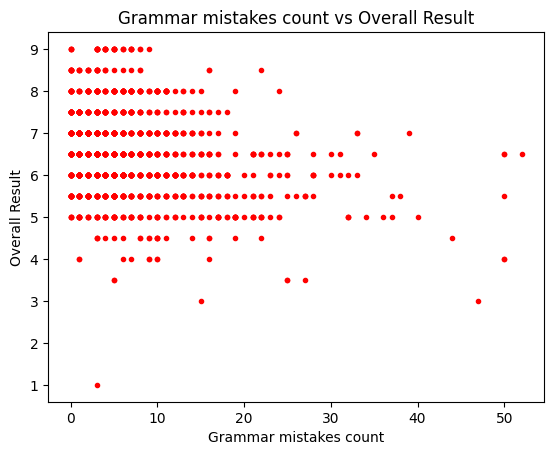

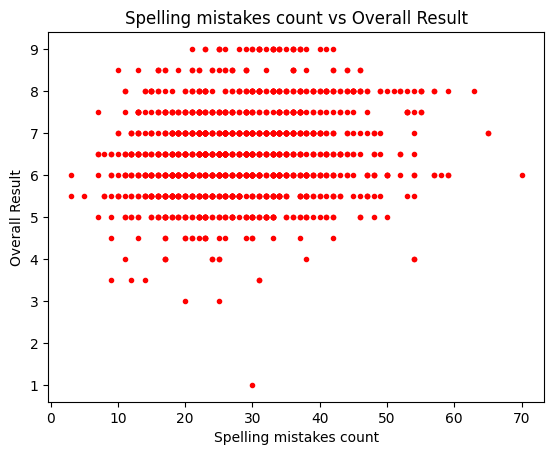

In [55]:
plt.title("Spelling mistakes count vs Overall Result")
plt.xlabel('Spelling mistakes count')
plt.ylabel('Overall Result')
plt.scatter(essays['count-sm'], essays['Overall'], color='red', marker='.')
plt.show()

In [57]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [92]:
clmtodrop = ['Question','Essay','combined_text']
newessays =  essays.drop(columns=clmtodrop)
newessays.head()

,Task_Type,Overall,count-gm,count-sm
0,1,5.5,0,16
1,2,6.5,3,34
2,1,5.0,10,26
3,2,5.5,13,39
4,1,7.0,3,22


In [93]:
newessays.to_csv("new_essay.csv")

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1148, 3)
(1148,)
(287, 3)
(287,)


In [74]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [75]:
predictions = model.predict(X_test)

In [76]:
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.8288645340164607


In [80]:
from sklearn import  metrics

In [81]:
r2= metrics.r2_score(y_test,predictions)
r2

-0.0835187284255956

In [85]:
from sklearn.svm import SVR


In [ ]:
model = SVR()
model.fit(X_train, y_train)

In [ ]:
new_essay = "Thos i's a new esay with some grammar mistakes. It discus various topics."
new_essay_tfidf = tfidf_vectorizer.transform([new_essay])
new_essay_grammar_mistakes = len(tool.check(new_essay))
new_essay_features = pd.concat([pd.DataFrame(new_essay_tfidf.toarray()), pd.DataFrame([new_essay_grammar_mistakes])], axis=1)
predicted_score = model.predict(new_essay_features)
print("Predicted Score:", predicted_score[0])
